# Установка нужных библиотек

In [1]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB:
    !wget -q -O requirements.txt https://raw.githubusercontent.com/Intelligent-Systems-Phystech/ProjectTemplate/master/code/requirements.txt
    !pip install -q -r requirements.txt

# Импорт библиотек

In [2]:
import numpy
from scipy.special import expit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

# Работа с данными

## Генерация синтетической выборки

In [3]:
# Фиксируем random state
numpy.random.seed(42)

# Задаем параметры синтетической выборки
n = 10 # Число признаков
m = 1000 # Число объектов

# Генерим синтетическую выборку
w = numpy.random.randn(n) # Генерим вектор параметров из нормального распределения
X = numpy.random.randn(m, n) # Генерим вектора признаков из нормального распределения

y = numpy.random.binomial(1, expit(X@w)) # Гипотеза порождения данных - целевая переменная из схемы Бернули

# Разделение выборки на обучение и контроль
X_train, X_test, y_train, y_test =  train_test_split(X, y)

# Эксперимент с логистической регрессией

## Обучение одной модели

In [4]:
model = LogisticRegression(penalty='l1', solver='saga', C=1.0)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       116
           1       0.88      0.84      0.85       134

    accuracy                           0.85       250
   macro avg       0.85      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



## Зависимость весов параметров от параметров регуляризации

In [5]:
Cs = numpy.linspace(0.1, 200, 100)
parameters = []
accuracy = []
for C in Cs:
    model = LogisticRegression(penalty='l1', solver='saga', C=1/C)
    model.fit(X_train, y_train)

    accuracy.append(
        classification_report(
            y_test, 
            model.predict(
                X_test), 
            output_dict=True)['accuracy']
    )
    
    parameters.extend(model.coef_)

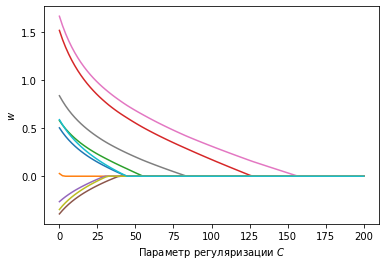

In [6]:
plt.plot(Cs, parameters)

plt.xlabel('Параметр регуляризации $C$')
plt.ylabel('$w$')

plt.savefig('../figures/log_reg_cs_exp.eps', bbox_inches='tight')

plt.show()